In [3]:
import tensorflow as tf

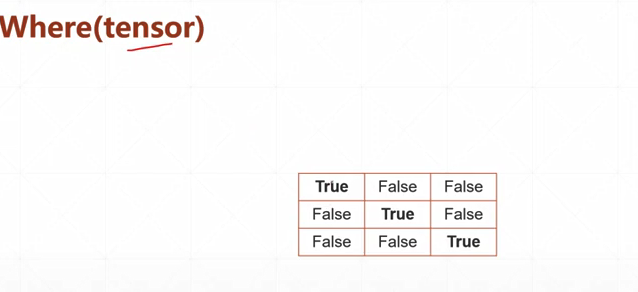

In [ ]:
a = tf.random.normal([3,3])
a

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.64904237, -1.5732888 ,  2.1647632 ],
       [ 0.42155376,  0.9555331 ,  0.552405  ],
       [-0.26795542,  0.8115692 , -0.12952557]], dtype=float32)>

In [ ]:
mask = a>0
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False,  True],
       [ True,  True,  True],
       [False,  True, False]])>

In [ ]:
tf.boolean_mask(a,mask)   #返回为True的数据

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1647632 , 0.42155376, 0.9555331 , 0.552405  , 0.8115692 ],
      dtype=float32)>

In [ ]:
indices = tf.where(mask)    #返回每一个True所在的维度
indices

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 1]])>

In [ ]:
tf.gather_nd(a,indices)     #与tf.boolean_mask(a,mask) 效果相同

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1647632 , 0.42155376, 0.9555331 , 0.552405  , 0.8115692 ],
      dtype=float32)>

### where 的使用示例

In [ ]:
tf.gather_nd(a, tf.where(a>0))

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1647632 , 0.42155376, 0.9555331 , 0.552405  , 0.8115692 ],
      dtype=float32)>

#### 但是如果where传入三个参数

In [ ]:
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False,  True],
       [ True,  True,  True],
       [False,  True, False]])>

In [ ]:
A = tf.ones([3,3])
B = tf.fill([3,3],2.)

In [ ]:
tf.where(mask,A,B)     #如果为True，则返回A中的值，如果为False，则返回B中的值

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 1.],
       [1., 1., 1.],
       [2., 1., 2.]], dtype=float32)>

### scatter_nd  用法灵活

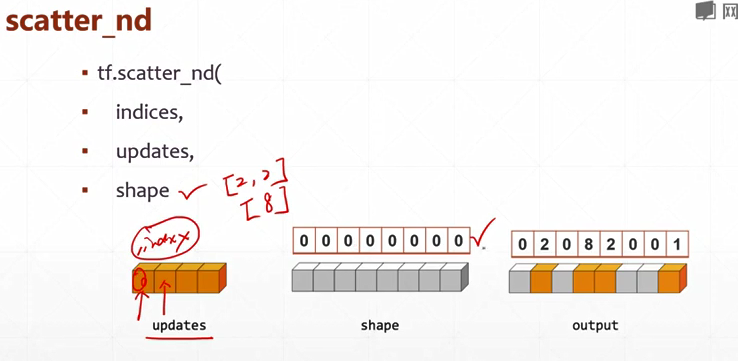

In [ ]:
indices = tf.constant([[4],[3],[2],[7]])   #需要更新的位置
updates = tf.constant([9,10,11,12])    #更新的数据源
shape = tf.constant([8])         #底板数据，注意这不是shape，而是tensor

In [ ]:
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0,  0, 11, 10,  9,  0,  0, 12], dtype=int32)>

多维度下使用

In [6]:
indices = tf.constant([[0],[2]])    #要更新的维度
indices

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[0],
       [2]], dtype=int32)>

In [12]:
updates = tf.broadcast_to(tf.expand_dims(tf.broadcast_to(tf.expand_dims(tf.range(5,9),1),[4,4]),0),[2,4,4])  #要更新的数据
updates

<tf.Tensor: shape=(2, 4, 4), dtype=int32, numpy=
array([[[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]]], dtype=int32)>

In [14]:
shape = tf.constant([4,4,4])     #创建空白数据底板
shape

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 4, 4], dtype=int32)>

In [15]:
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int32)>

### meshgrid

In [20]:
y = tf.linspace(-2,2,5)
x = y
y

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-2., -1.,  0.,  1.,  2.])>

In [21]:
points_x,points_y = tf.meshgrid(x,y)    #将两个一维的点组合为二维的点

In [22]:
points_x.shape

TensorShape([5, 5])

In [24]:
points_x,points_y

(<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.]])>,
 <tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[-2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.]])>)

In [26]:
points = tf.stack([points_x,points_y],axis=2)   #将两个轴合并为空间中的点坐标，这是并行的方式
points

<tf.Tensor: shape=(5, 5, 2), dtype=float64, numpy=
array([[[-2., -2.],
        [-1., -2.],
        [ 0., -2.],
        [ 1., -2.],
        [ 2., -2.]],

       [[-2., -1.],
        [-1., -1.],
        [ 0., -1.],
        [ 1., -1.],
        [ 2., -1.]],

       [[-2.,  0.],
        [-1.,  0.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.]],

       [[-2.,  1.],
        [-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.]],

       [[-2.,  2.],
        [-1.,  2.],
        [ 0.,  2.],
        [ 1.,  2.],
        [ 2.,  2.]]])>